In [5]:
import sys
from tensorflow import keras
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [6]:
def load_dataset():
    # loading of the data
    (trainX, trainY), (testX, testY) = cifar100.load_data()
    print(f'Train : X = {trainX.shape}, Y = {trainY}')
    print(f'Test : X = {testX.shape}, Y = {testY}')

    # one hot encoding for categorical data (only output)

    trainY = keras.utils.to_categorical(trainY)
    testY = keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY

In [7]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm  = test.astype('float32')

    # normalize between 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0

    # returning scaled images or normalized images
    return train_norm, test_norm

In [8]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(100, activation='softmax'))
    # compling model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
def summarize_diagnostics(history):
    # plot the loss
    pyplot.subplot(211)
    pyplot.title("Cross Entropy Loss")
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()

In [11]:
def run_test():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    #define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # # learning curves
    summarize_diagnostics(history)

    # #learning curves
    # summarize_diagnostics(history)
    model.save("cifar_model_100.h5")

In [12]:
run_test()


169009152/169001437 [==============================] - 2s 0us/step
Train : X = (50000, 32, 32, 3), Y = [[19]
 [29]
 [ 0]
 ...
 [ 3]
 [ 7]
 [73]]
Test : X = (10000, 32, 32, 3), Y = [[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
782/782 [==============================] - 38s 8ms/step - loss: 4.4467 - accuracy: 0.0349 - val_loss: 4.1568 - val_accuracy: 0.0736
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 3.9070 - accuracy: 0.1104 - val_loss: 3.7182 - val_accuracy: 0.1447
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 3.5312 - accuracy: 0.1739 - val_loss: 3.4274 - val_accuracy: 0.1940
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 3.2639 - accuracy: 0.2197 - val_loss: 3.2467 - val_accuracy: 0.2233
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 3.0537 - accuracy: 0.2574 - val_loss: 3.0428 - val_accuracy: 0.2591
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 2.8711 - accuracy: 0.2925 - val_loss: 2.9809 - val_accuracy: 0.2743
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 2.7164 - accuracy: 0.3240 - val_loss: 2.8475 - val_accuracy: 0.3023
Epoch

In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [3]:
def load_image(filename):

  img = load_img(filename, target_size =(32,32))
  img = img_to_array(img)
  img = img.reshape(1,32,32,3)
  img = img.astype("float32")
  img = img / 255.0
  return img

In [4]:
def run_example():
  # provide the path of the image
  img = load_image("PUT PATH OF THE IMAGE HERE")
  model = load_model("PUT PATH OF THE TRAINED MODEL")
  result = model.predict_classes(img)
  # cifar_list =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
  #              'frog', 'horse', 'ship', 'truck']
  # index = result[0]
  print(result[0])

Epoch 1/100
800/800 [==============================] - 4s 4ms/step - loss: 4.0286 - accuracy: 0.0795 - val_loss: 3.6257 - val_accuracy: 0.1365
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 3.3951 - accuracy: 0.1811 - val_loss: 3.2487 - val_accuracy: 0.2084
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 3.0490 - accuracy: 0.2429 - val_loss: 3.0007 - val_accuracy: 0.2576
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 2.8165 - accuracy: 0.2876 - val_loss: 2.8484 - val_accuracy: 0.2869
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 2.6299 - accuracy: 0.3281 - val_loss: 2.7544 - val_accuracy: 0.3068
Epoch 6/100
800/800 [==============================] - 3s 4ms/step - loss: 2.4756 - accuracy: 0.3578 - val_loss: 2.6687 - val_accuracy: 0.3267
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 2.3339 - accuracy: 0.3889 - val_loss: 2.6609 - val_accuracy: 0.3360

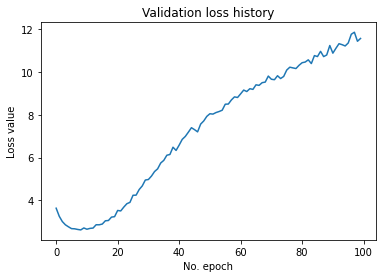

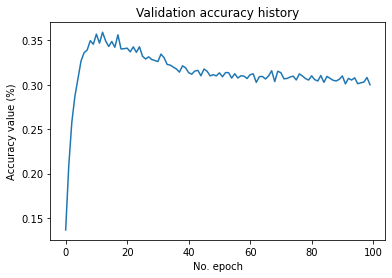